# 🐶 Multi-class Dog Breed Classification using TensorFlow and Deep Learning

## 1. Problem

Identifying the breed of a dog given an image of a dog.
Also to know the breed of my own dog when taken a live picture.

## 2. Data

The data I am using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data 

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features

Some information about the data:
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set (these images have labels).
* There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them). 


In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
print(tf.__version__)

2.3.0


In [ ]:
!unzip "drive/My Drive/dogs/dog-breed-identification.zip" -d "drive/My Drive/dogs/"

In [3]:
labels_csv=pd.read_csv("drive/My Drive/dogs/labels.csv")

In [4]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [5]:
labels_csv.tail()

,id,breed
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher
10221,fff43b07992508bc822f33d8ffd902ae,chesapeake_bay_retriever


In [6]:
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
brabancon_griffon        67
komondor                 67
golden_retriever         67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

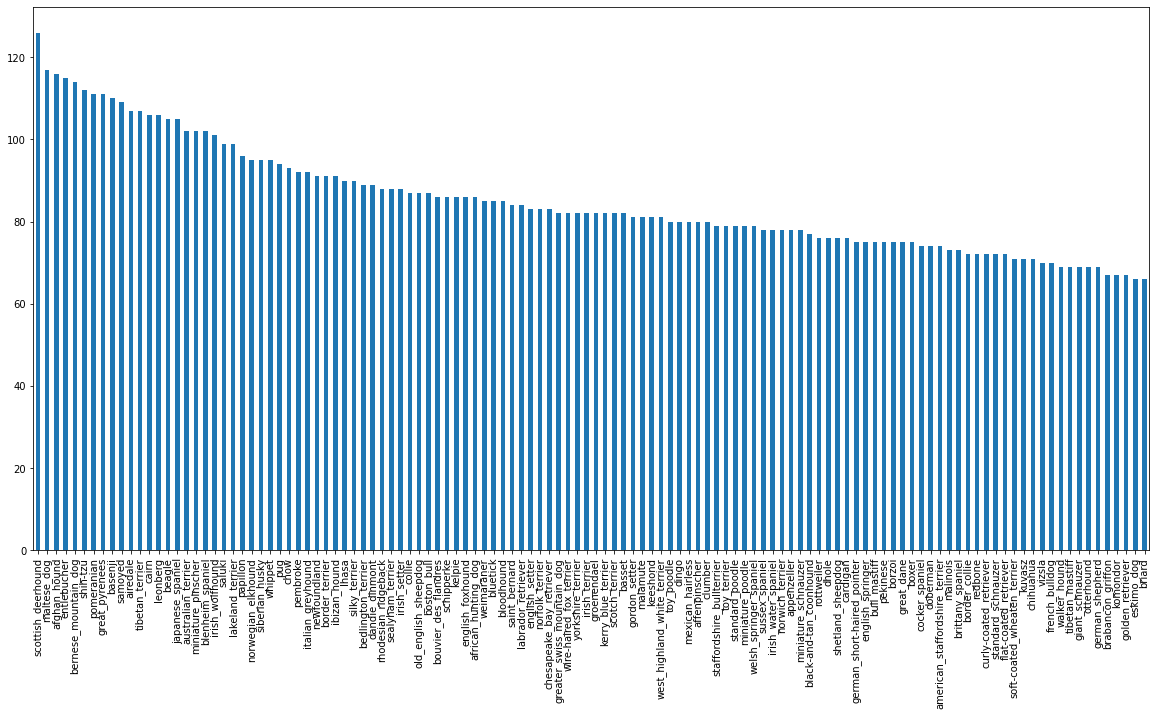

In [7]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [8]:
labels_csv["breed"].value_counts().median()

82.0

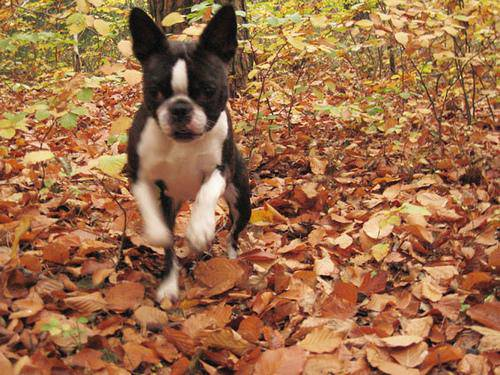

In [9]:
#viewing an image
from IPython.display import Image
Image("drive/My Drive/dogs/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [10]:
#creating pathnames from image ids
filename=["drive/My Drive/dogs/train/" + fname + ".jpg" for fname in labels_csv["id"]]

In [11]:
filename[:10]

['drive/My Drive/dogs/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/dogs/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/dogs/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/dogs/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/dogs/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/dogs/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/dogs/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/dogs/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/dogs/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/dogs/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [12]:
#checking whether number of filename matches the number of actual image
import os
if len(os.listdir("drive/My Drive/dogs/train/"))==len(filename):
  print("MATCHES")
else:
  print("does not macthes")

MATCHES


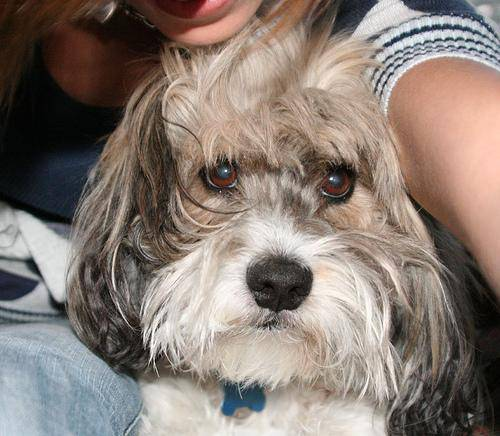

In [13]:
Image(filename[900])

In [14]:
labels_csv["breed"][900]

'lhasa'

In [15]:
labels=labels_csv["breed"].dtype
labels

dtype('O')

In [16]:
labels=labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [17]:
if len(labels)== len(filename):
  print("MACTHES")
else:
  print("does not matches")  


MACTHES


In [18]:
unique_breeds=np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [19]:
len(unique_breeds)

120

In [20]:
print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [21]:
#turning every label into boolean array
boolean_labels=[label==unique_breeds for label in labels]

In [22]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [23]:
len(boolean_labels)

10222

In [24]:
# turning booolean arrray into integers
print(labels[0])
print(np.where(unique_breeds==labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Validation Set

In [25]:
X=filename
y=boolean_labels

In [26]:
len(filename)

10222

In [27]:
#experimenting with few images initailly
NUM_IMAGES=1000 #@param {type:"slider",min:1000,max:10000,step:100}

In [28]:
#spliting the data into train and validation sets
np.random.seed(5)
X_train,X_val,y_train,y_val=train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2)


In [29]:
len(X_train),len(X_val),len(y_train),len(y_val)

(800, 200, 800, 200)

In [30]:
X_train[:5]

['drive/My Drive/dogs/train/011761e3ae8ec5e188e8f0bcb59bb8b6.jpg',
 'drive/My Drive/dogs/train/18178aae17060733ebce2cff03413a8c.jpg',
 'drive/My Drive/dogs/train/145f7bb3bf6e4877b8b6624f612a1c24.jpg',
 'drive/My Drive/dogs/train/17f15b80ab3238f1fbe5961286db0eba.jpg',
 'drive/My Drive/dogs/train/153f05ef64f050530ea746a357855b20.jpg']

In [31]:
y_train[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

## Preprocessing Images(Tensors)

In [32]:
from matplotlib.pyplot import imread
image=imread(filename[23])
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 291, 3), dtype=uint8, numpy=
array([[[214, 235, 236],
        [241, 255, 255],
        [163, 181, 185],
        ...,
        [253, 255, 245],
        [253, 255, 245],
        [253, 255, 245]],

       [[233, 249, 248],
        [228, 244, 243],
        [ 97, 111, 112],
        ...,
        [252, 254, 249],
        [252, 254, 249],
        [252, 254, 249]]], dtype=uint8)>

In [33]:
#defining image size
IMG_SIZE=224

#creating a function  for preprocessing images
def process_image(image_path,img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into tensor
  """
  #reading image file
  image=tf.io.read_file(image_path)
  #Turning the jpeg image intonumerical tensor with 3RBG color channels.
  image=tf.image.decode_jpeg(image,channels=3)
  #converting the color channel vulues from 0-255 to 0-1
  image=tf.image.convert_image_dtype(image,tf.float32)
  #resize image to our desired value(224,224)
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
  return image

## Turning the data into batches

In [34]:
#creating a fuction to return a tuple(image,label)
def get_image_label(image_path,label):
  """
  Takes an image file path name and label and returns into tuple of (image,label)
  """
  image=process_image(image_path)
  return image,label

In [35]:
#defining the batch size
BATCH_SIZE = 32

# Creating a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we dont have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels 
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

 


In [36]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [37]:
 # Checking out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

In [38]:
import matplotlib.pyplot as plt

# Creating a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image 
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [39]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

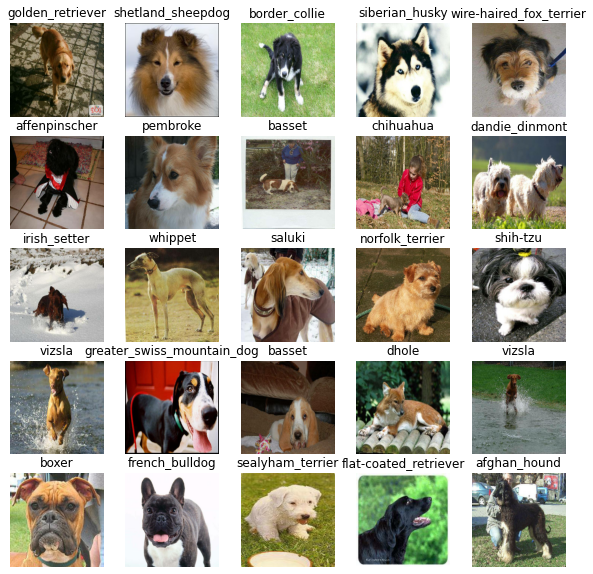

In [40]:
# Now let's visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

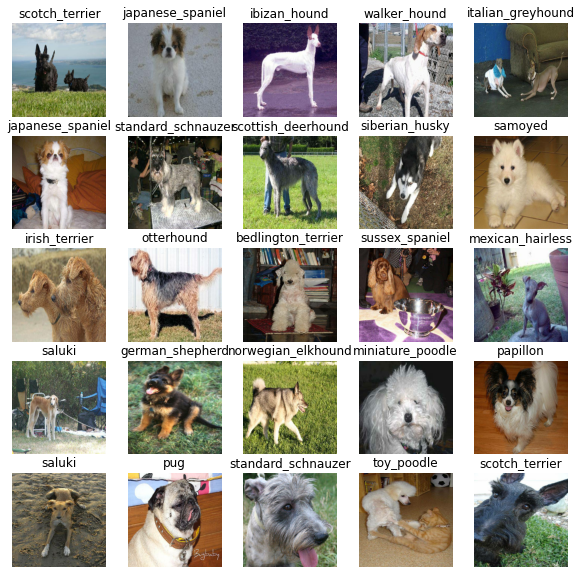

In [41]:
# # Now let's visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model


* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model that used from TensorFlow Hub - https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4

In [42]:
IMG_SIZE

224

In [43]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [44]:
INPUT_SHAPE

[None, 224, 224, 3]

In [45]:
# Creating a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compiling the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Building the model
  model.build(INPUT_SHAPE)

  return model

In [46]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks
Creating two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.

## TensorBoard Callback

In [47]:
# Loading TensorBoard notebook extension
%load_ext tensorboard

In [48]:
import datetime

# Creating a function to build a TensorBoard     callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/My Drive/Dog Vision/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early Stopping Callback

In [49]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a model (on subset of data)

Our first model is only going to train on 1000 images, to make sure everything is working.

In [50]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [51]:
# Building a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Creating a model
  model = create_model()

  # Creating new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fitting the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Returning the fitted model
  return model

In [52]:
# Fitting the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
 1/25 [>.............................] - ETA: 0s - loss: 5.9668 - accuracy: 0.0000e+00WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


Instructions for updating:
use `tf.profiler.experimental.stop` instead.


25/25 [==============================] - 500s 20s/step - loss: 4.6050 - accuracy: 0.0900 - val_loss: 3.4597 - val_accuracy: 0.2700
Epoch 2/100
25/25 [==============================] - 4s 179ms/step - loss: 1.6484 - accuracy: 0.7038 - val_loss: 2.0605 - val_accuracy: 0.5200
Epoch 3/100
25/25 [==============================] - 5s 183ms/step - loss: 0.5698 - accuracy: 0.9463 - val_loss: 1.5704 - val_accuracy: 0.6050
Epoch 4/100
25/25 [==============================] - 5s 181ms/step - loss: 0.2474 - accuracy: 0.9900 - val_loss: 1.3866 - val_accuracy: 0.6250
Epoch 5/100
25/25 [==============================] - 4s 179ms/step - loss: 0.1448 - accuracy: 0.9987 - val_loss: 1.2800 - val_accuracy: 0.6350
Epoch 6/100
25/25 [==============================] - 4s 179ms/step - loss: 0.0981 - accuracy: 1.0000 - val_loss: 1.2300 - val_accuracy: 0.6500
Epoch 7/100
25/25 [==============================] - 5s 183ms/step - loss: 0.0739 - accuracy: 1.0000 - val_loss: 1.1861 - val_accuracy: 0.6600
Epoch 8/100

## Checking the TensorBoard logs

In [53]:
#%tensorboard --logdir drive/My\ Drive/dogs/logs

## Making and evaluating predictions using a trained model¶

In [54]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [55]:
# Making predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 1s 115ms/step


array([[2.8316129e-02, 7.9914188e-04, 1.5975378e-03, ..., 3.0806282e-04,
        1.8240616e-04, 7.2184636e-04],
       [4.8830151e-03, 3.1246254e-04, 8.0009789e-04, ..., 5.1883317e-04,
        7.3145748e-05, 3.2257526e-03],
       [2.5787363e-06, 1.4240033e-04, 1.3147417e-03, ..., 1.5049851e-01,
        2.4785515e-04, 6.4352894e-06],
       ...,
       [1.6591842e-04, 5.6843244e-02, 5.9430273e-05, ..., 2.5995474e-05,
        1.5806256e-05, 3.5649646e-05],
       [2.8446442e-05, 8.2888594e-04, 4.7985319e-05, ..., 1.2897953e-03,
        1.1102132e-03, 3.3616200e-06],
       [4.7304967e-04, 1.1320815e-04, 2.4596215e-04, ..., 2.2289074e-05,
        6.9750320e-05, 3.7796490e-04]], dtype=float32)

In [56]:
# First prediction
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[4.22167731e-03 2.05200922e-04 6.14473072e-04 4.61679418e-04
 2.55509699e-03 1.67283270e-05 1.64962126e-04 1.00029213e-02
 1.68570713e-03 4.97132353e-03 1.29805014e-01 5.61099674e-04
 1.38212945e-05 1.08929202e-02 1.99702336e-05 2.51424615e-03
 2.80191394e-04 5.89350646e-04 3.39848011e-05 7.83335697e-03
 1.07174333e-06 1.74354154e-05 4.10926435e-03 6.21464642e-05
 7.72326239e-05 2.34701965e-05 3.30329749e-05 2.83633213e-04
 2.60607794e-05 8.94765332e-02 3.52435563e-05 7.07946820e-05
 1.50794501e-03 1.51071523e-03 4.05986793e-04 6.42193845e-05
 1.89067055e-06 3.77681249e-06 8.27961849e-05 2.99800886e-04
 7.96607812e-04 2.05246918e-03 2.80212116e-04 3.05292662e-04
 6.24861568e-05 9.54439965e-05 1.41106721e-04 2.69686468e-02
 7.28343502e-06 1.32835645e-04 2.52488212e-06 3.62827239e-04
 6.61040249e-04 7.35307367e-06 9.09601476e-06 8.84677138e-05
 5.31964703e-04 1.09979408e-02 8.40926587e-05 8.58259373e-05
 2.04367489e-02 1.30169243e-02 7.43128548e-05 2.70132841e-05
 1.12050380e-04 1.287271

In [57]:
# Turning prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'scotch_terrier'

In [58]:
# Creating a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.7641962 , 0.76027465, 0.7916472 ],
         [0.7620563 , 0.7581347 , 0.7878738 ],
         [0.7625701 , 0.7586485 , 0.7821779 ],
         ...,
         [0.552146  , 0.6561026 , 0.7737497 ],
         [0.53821784, 0.64624214, 0.7382063 ],
         [0.53821784, 0.64646566, 0.7329637 ]],
 
        [[0.8080594 , 0.8041378 , 0.8297331 ],
         [0.8113446 , 0.80742306, 0.83126605],
         [0.8154983 , 0.8115767 , 0.8322175 ],
         ...,
         [0.5694503 , 0.66460085, 0.77600646],
         [0.5469538 , 0.6461827 , 0.7322996 ],
         [0.5469538 , 0.6464225 , 0.7307186 ]],
 
        [[0.82923675, 0.82710093, 0.8488446 ],
         [0.8325631 , 0.8304273 , 0.8496019 ],
         [0.840352  , 0.8382161 , 0.8551454 ],
         ...,
         [0.59872204, 0.6726891 , 0.76677006],
         [0.58450633, 0.6615021 , 0.74114984],
         [0.58450633, 0.6615021 , 0.7360119 ]],
 
        ...,
 
        [[0.5186743 , 0.5678691 , 0.29699323],
         [0.3973296 , 0.4537723 , 0.13301

In [59]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

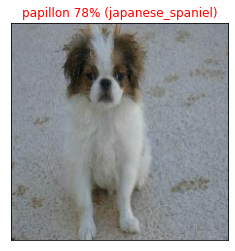

In [60]:
# Viewing an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

In [61]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

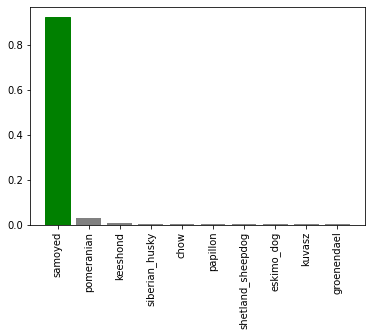

In [62]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

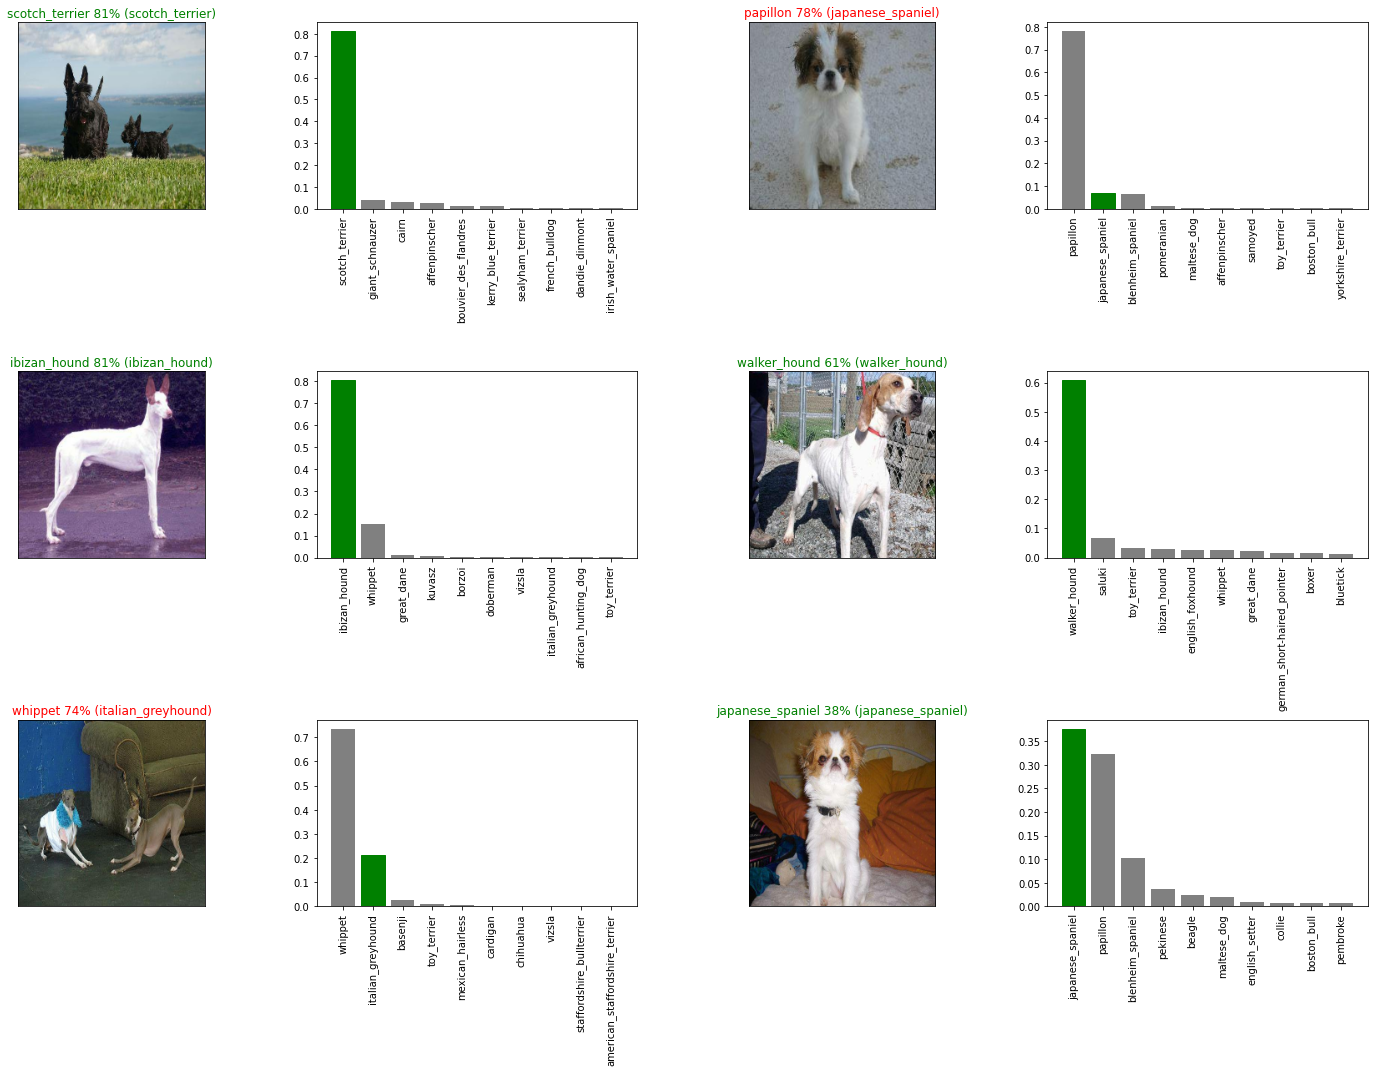

In [63]:
# checking a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [64]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("drive/My Drive/dogs/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [65]:

def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [66]:
# Saving the model trained on 1000 images
save_model(model, suffix="1000-images-Adam")


Saving model to: drive/My Drive/dogs/models/20200804-11581596542310-1000-images-Adam.h5...


'drive/My Drive/dogs/models/20200804-11581596542310-1000-images-Adam.h5'

In [67]:
# Evaluating the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 100ms/step - loss: 1.0755 - accuracy: 0.6650


[1.075545310974121, 0.6650000214576721]

## Training a model (on the full data)

In [68]:
len(X), len(y)

(10222, 10222)

In [69]:
# Turning full training data in a data batch
full_data = create_data_batches(X, y)

Creating training data batches...


In [70]:
# Instantiate a new model for training on the full dataset
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [74]:
# Create full model callbacks

# TensorBoard callback
full_model_tensorboard = create_tensorboard_callback()

# Early stopping callback
# Note: No validation set when training on all the data, therefore can't monitor validation accruacy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [72]:
#%tensorboard --logdir drive/My\ Drive/dogs/logs

In [73]:
# Fitting the full model to the full training data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, 
                          full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 6545s 20s/step - loss: 1.3207 - accuracy: 0.6701
Epoch 2/100
320/320 [==============================] - 49s 152ms/step - loss: 0.4011 - accuracy: 0.8807
Epoch 3/100
320/320 [==============================] - 48s 152ms/step - loss: 0.2358 - accuracy: 0.9363
Epoch 4/100
320/320 [==============================] - 49s 154ms/step - loss: 0.1533 - accuracy: 0.9634
Epoch 5/100
320/320 [==============================] - 48s 151ms/step - loss: 0.1072 - accuracy: 0.9777
Epoch 6/100
320/320 [==============================] - 49s 152ms/step - loss: 0.0770 - accuracy: 0.9866
Epoch 7/100
320/320 [==============================] - 48s 151ms/step - loss: 0.0578 - accuracy: 0.9926
Epoch 8/100
320/320 [==============================] - 48s 151ms/step - loss: 0.0453 - accuracy: 0.9942
Epoch 9/100
320/320 [==============================] - 49s 152ms/step - loss: 0.0364 - accuracy: 0.9960
Epoch 10/100
320/320 [==============================] - 50s 155m

In [75]:
# Saving model to file
save_model(full_model, suffix="all-images-Adam")

Saving model to: drive/My Drive/dogs/models/20200804-14191596550746-all-images-Adam.h5...


'drive/My Drive/dogs/models/20200804-14191596550746-all-images-Adam.h5'

## Making predictions on the test dataset

In [77]:
# Load test image filenames (since we're using os.listdir(), these already have .jpg)
test_path = "drive/My Drive/dogs/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]

['drive/My Drive/dogs/test/f0ee3d22666302ec27338aa29f34c72f.jpg',
 'drive/My Drive/dogs/test/ede0dddd46a46f8f6467b7fbd1b4958a.jpg',
 'drive/My Drive/dogs/test/e8b49a4b2c22d3c5cb3c88c61654e991.jpg',
 'drive/My Drive/dogs/test/eb2f2ad0f785a7c85f8c62969be71e2a.jpg',
 'drive/My Drive/dogs/test/ebf7096a543da53b1e4759753aedad26.jpg',
 'drive/My Drive/dogs/test/ea1993074afd8a51c571bb0f733a754d.jpg',
 'drive/My Drive/dogs/test/f3228d0cf1dd0163bb365717eb0254f0.jpg',
 'drive/My Drive/dogs/test/e8889cf9d7b2701a85be1c97661b9b26.jpg',
 'drive/My Drive/dogs/test/f49dbff2463687f867bfe1bc88f0a7c3.jpg',
 'drive/My Drive/dogs/test/f35c272e3ece87df743552aa517488b0.jpg']

In [78]:
# How many test images are there?

len(test_filenames)

10357

In [79]:
# Creating test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [80]:
# Making predictions on test data batch using the loaded full model
test_predictions = full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 7818s 24s/step


In [82]:
test_predictions[:10]

array([[7.1242240e-10, 3.4206143e-10, 5.3220705e-12, ..., 2.0061654e-08,
        1.7161456e-10, 2.8459429e-10],
       [7.3739317e-09, 1.6766977e-09, 3.0483043e-09, ..., 2.1638402e-09,
        9.9416638e-07, 1.6475285e-06],
       [3.9172574e-10, 2.3213420e-09, 2.4481178e-11, ..., 1.3009590e-08,
        5.1204319e-10, 1.1795950e-11],
       ...,
       [2.9161565e-10, 1.0830679e-06, 1.1636505e-09, ..., 6.1574552e-05,
        5.1853561e-08, 1.2749346e-10],
       [9.2321900e-10, 1.8757119e-10, 1.2775200e-10, ..., 1.8856490e-09,
        2.8270202e-09, 9.0021157e-11],
       [2.4134462e-13, 1.6599884e-10, 1.6204464e-10, ..., 9.1526071e-13,
        5.3238761e-08, 1.3790314e-11]], dtype=float32)

## Preparing test dataset predictions for Kaggle

Looking at the Kaggle sample submission, we find that it wants our models prediction probaiblity outputs in a DataFrame with an ID and a column for each different dog breed.
https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

To get the data in this format, we'll:
* Create a pandas DataFrame with an ID column as well as a column for each dog breed. ✅
* Add data to the ID column by extracting the test image ID's from their filepaths.
* Add data (the prediction probabilites) to each of the dog breed columns.
* Export the DataFrame as a CSV to submit it to Kaggle.

In [83]:
# Creating a pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [84]:
# Appending test image ID's to predictions DataFrame
test_path = "drive/My Drive/dogs/test/"
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,f0ee3d22666302ec27338aa29f34c72f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ede0dddd46a46f8f6467b7fbd1b4958a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e8b49a4b2c22d3c5cb3c88c61654e991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,eb2f2ad0f785a7c85f8c62969be71e2a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ebf7096a543da53b1e4759753aedad26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
# Adding the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,f0ee3d22666302ec27338aa29f34c72f,7.12422e-10,3.42061e-10,5.32207e-12,1.92385e-11,1.04482e-09,1.13049e-07,1.40909e-11,1.7504e-10,5.95805e-11,7.25227e-11,4.40226e-10,2.4175e-06,1.99387e-11,1.81412e-06,4.59448e-11,3.35791e-08,0.000135312,1.34246e-11,4.29735e-07,1.27933e-06,3.30512e-12,2.74743e-08,6.3146e-12,3.25602e-11,8.03338e-06,1.35813e-11,8.73684e-11,4.21024e-07,7.36964e-12,6.63254e-10,1.78226e-10,3.45533e-09,1.09477e-06,0.000925253,4.45177e-10,1.60512e-11,2.63466e-10,2.43075e-12,7.75601e-09,...,2.66735e-10,2.34631e-10,2.17754e-07,1.17812e-10,2.02409e-07,1.79408e-12,3.92077e-12,1.81736e-09,1.22041e-09,2.30145e-10,8.27681e-11,1.48253e-13,3.47154e-07,2.84851e-07,7.26319e-08,2.72984e-11,5.89631e-09,1.60585e-08,2.02386e-12,1.75608e-09,4.60084e-08,3.453e-06,1.90534e-10,3.40637e-12,1.14049e-10,2.43314e-07,1.45528e-11,3.12054e-08,1.52326e-10,8.89199e-09,2.04979e-12,3.92159e-11,1.82707e-11,7.65371e-07,1.45034e-09,0.00047644,1.81615e-09,2.00617e-08,1.71615e-10,2.84594e-10
1,ede0dddd46a46f8f6467b7fbd1b4958a,7.37393e-09,1.6767e-09,3.0483e-09,1.75264e-08,3.66491e-08,1.36197e-07,1.07666e-08,1.03888e-10,1.42233e-07,1.20752e-05,1.18235e-10,3.99559e-07,2.87955e-08,8.86492e-08,1.79543e-10,5.58959e-06,0.000273262,9.65646e-10,5.72411e-09,1.78293e-06,1.79507e-10,5.84513e-09,2.66346e-10,1.07228e-08,0.538153,4.7152e-09,1.70899e-07,6.95015e-10,3.15027e-09,1.41311e-06,8.56426e-10,2.60965e-06,8.41908e-05,8.25375e-06,1.0491e-08,2.03151e-07,8.10338e-09,9.90066e-11,1.06407e-09,...,5.05158e-08,6.498e-09,9.04382e-09,3.73763e-05,2.11108e-07,2.59675e-08,4.86312e-10,8.40252e-09,3.25146e-09,2.54712e-10,2.13982e-12,1.44362e-12,1.0849e-08,1.66057e-08,6.82175e-08,2.48755e-08,4.0863e-08,8.46654e-07,1.55992e-08,1.35368e-07,4.22869e-07,6.51871e-08,1.48191e-06,1.49987e-09,6.95081e-07,2.25389e-05,4.02597e-07,4.68592e-06,4.92305e-09,2.60369e-08,5.08301e-09,1.77896e-08,1.13733e-05,4.01166e-08,2.29885e-09,2.11942e-06,7.37888e-08,2.16384e-09,9.94166e-07,1.64753e-06
2,e8b49a4b2c22d3c5cb3c88c61654e991,3.91726e-10,2.32134e-09,2.44812e-11,1.07765e-10,8.95862e-11,3.69297e-11,1.28369e-10,2.80606e-10,1.42345e-10,8.21985e-12,8.97879e-09,4.1964e-10,4.0118e-11,7.57906e-11,2.87394e-10,9.33342e-11,3.74534e-09,5.74252e-12,2.03584e-10,1.72393e-10,6.79933e-09,2.04162e-12,4.73638e-10,4.66458e-11,2.08044e-10,4.25304e-09,3.57981e-09,7.21294e-11,2.70143e-10,1.71514e-12,6.80905e-10,1.78596e-08,1.52406e-11,5.79879e-10,3.60577e-11,7.84135e-10,1.35866e-10,2.37895e-10,3.76041e-10,...,4.05435e-10,9.88464e-10,1.04061e-06,1.85147e-09,1.49083e-11,1.15786e-09,2.21489e-12,3.37678e-11,4.41068e-10,3.39113e-10,2.15006e-08,3.11273e-10,1.26655e-10,2.26612e-10,1.90493e-09,4.79048e-09,2.79238e-09,1.00211e-08,4.10342e-08,1.43234e-11,2.25009e-10,2.98728e-11,1.54634e-10,8.52951e-09,2.36866e-10,1.10129e-09,8.56173e-10,5.37805e-09,6.87153e-08,4.67819e-08,1.75873e-08,3.25549e-11,2.96166e-11,1.72896e-09,2.07891e-08,2.87449e-

In [86]:
# Saving our predictions dataframe to CSV for submission to Kaggle
preds_df.to_csv("drive/My Drive/dogs/full_model_predictions_submission_1_mobilenetV2.csv",
                index=False)

## Making predictions on custom images

In [87]:
# Getting custom image filepaths
custom_path = "drive/My Drive/dogs/custom/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [88]:
# Turning custom image into batch (set to test data because there are no labels)
custom_data = create_data_batches(custom_image_paths, test_data=True)

Creating test data batches...


In [89]:
# Making predictions on the custom data
custom_preds = full_model.predict(custom_data)

In [99]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[0]) for i in range(len(custom_preds))]
custom_pred_labels

['golden_retriever', 'golden_retriever']

In [100]:
# Get custom images (our unbatchify() function won't work since there aren't labels)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

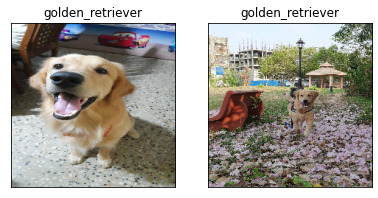

In [101]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)